<a href="https://colab.research.google.com/github/tirals88/Numerical-Mathematics-and-Computing/blob/main/Chap7_Initial%20Values%20Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

%matplotlib inline

# 7.1 테일러 급수법

## 초깃값 문제: 해석 해와 수치 해 비교

ODE ordinary differential equation은 미지의 함수의 1계 또는 그 이상의 $n$계 도함수를 포함하는 방정식이다. 이 장에서는 한 가지 유형의 미분방정식과 한 가지 유형의 보조 조건, 즉 1차 미분방정식에 대한 초깃값 문제 initial-value problem IVP 에 초점을 맞추려 한다. 초깃값 문제의 표준형은 다음과 같다.

\begin{equation}
\begin{cases}
x' &= f(t, x) \\
x(a) &= x_{0}
\end{cases}
\end{equation}

$x$는 $t$의 함수로 상정되므로 더 자세하게 미분방정식을 기술하면 다음과 같다.
\begin{equation}
\frac{dx(t)}{dt} = f(t, x(t))
\end{equation}

미분방정식의 해석 해를 얻기 위한 방법은 많이 있지만 각 방법들의 쓰임은 주로 몇몇 특수한 미분방정식으로만 한정된다. 적용 가능한 경우에는 수식의 형태로 해를 생성할 수 있지만 ***실제 문제에서는 특수한 방법으로도 해를 구할 수 없는 미분방정식이 흔하기 때문에 이런 경우에 수치 해를 모색해야 한다.*** 미분방정식의 수치해는 대개 표의 형태로 얻어진다.

종종 미분방정식에 대해 수치 해를 원하게 되는데 이는 닫힌 형태 ( $x = g(t)$와 같이 독립 변수 $t$의 함수로 표현된 해를 말한다. )의 해가 매우 복잡하고 계산하기 어려울 것으로 예측되거나 다른 선택지가 없기 때문이다.

예를 들어 다음과 같은 미분방정식의 해는 우변을 적분하거나 역도함수를 취함으로써  구할 수 있다.

$$x' = e^{-\sqrt{t^{2} - sin(t)}} + \ln{|sin(t) + tanh(t^{3})}$$

그 과정은 이론적으로는 가능하나 실제로는 가능하지 않다. $x(t)$를 친숙한 함수들로 표현할 수는 없다.

또한 컴퓨터로 상미분방정식을 풀려면 크기가 작은 단계들이 수없이 많이 필요할 수 있으므로 상당한 양의 반올림 오차가 누적될 수 있다. 따라서 다중 정밀도 계산이 필요할 수 있다.


## 미분방정식의 풀이와 적분

미분방정식을 푸는 것과 적분 사이에는 밀접한 관련이 있다. 위의 표준형을 예로 들면 다음의 적분식을 얻을 수 있다.

$$x(a+h) = x(a) + \int^{a+h}_{a}{f(t, x(t))}$$

그리고 사다리꼴 공식으로부터 다음을 얻을 수 있다.

$$x(a+h) = x(a) + \frac{h}{2}[f(t, x(t)) + f(t+h, x(t+h))$$





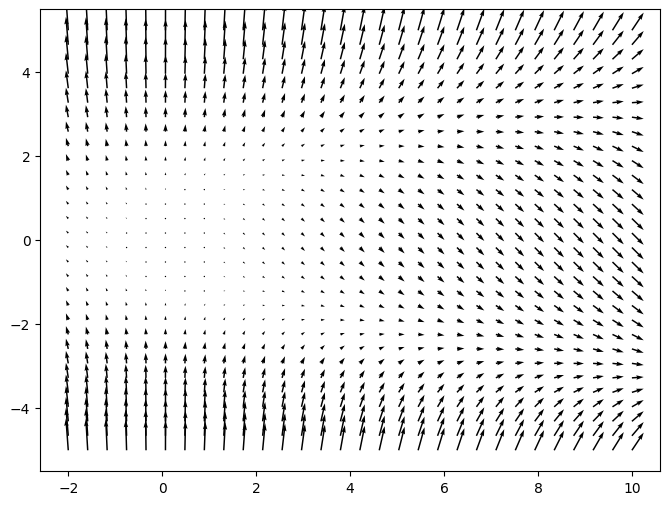

In [ ]:
t,x = np.meshgrid(np.linspace(-2,10,30),np.linspace(-5,5,30))

u = t
v = x**2 - t

plt.figure(figsize=(8, 6))
plt.quiver(t,x,u,v)
plt.show()

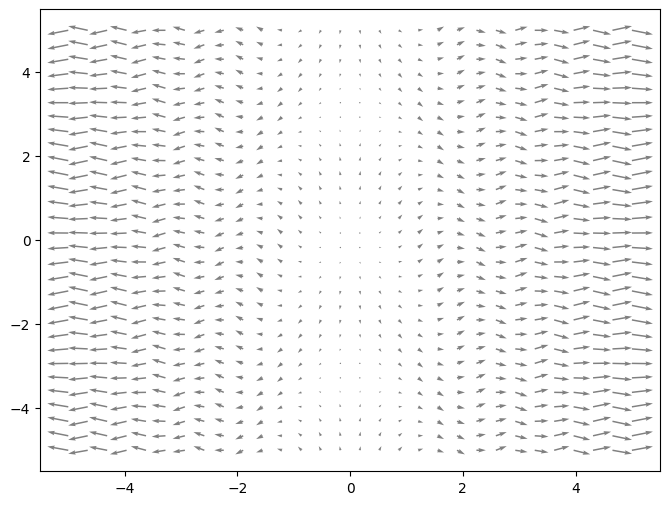

In [ ]:
t,x = np.meshgrid(np.linspace(-5,5,30),np.linspace(-5,5,30))

u = t
v = np.sin(x + t**2)



plt.figure(figsize=(8,6))
plt.quiver(t,x,u,v,color='0.5', alpha=1)
plt.show()

초깃값 문제에서의 해의 유일성

$f$와 $\frac{\partial f}{\partial x}$ 가 $|t-t_{0}|<\beta$로 정의되는 직사각형에서 연속이면 초깃값 문제 $x'=f(t, x),\: x(t_{0}) = x_{0}$는어떤 구간 $|t-t_{0}|<\epsilon$에서 연속인 유일한 해를 갖는다.

## 테일러 급수법

테일러 급수법을 이용한 수치적 방법은 자연스럽고 높은 정밀도를 보여준다. 이는 미분방정식의 해를 국소적으로 테일러 급수의 몇 개 항으로 표현하는 것이다.

미분방정식의 해가 가음과 같이 테일러 급수로 표현된다고 가정하자.

\begin{eqnarray}
x(t+h) &= x(t) &+ hx'(t) + \frac{1}{2!}h^{2}x''(t) + \frac{1}{3!}h^{3}x'' '(t) \\
&&+\frac{1}{4!}h^{4}x^{(4)} + \cdots + \frac{1}{m!}h^{m}x^{(m)}(t) + \cdots
\end{eqnarray}

$\frac{1}{m!}h^{m}x^{(m)}(t)$까지의 항만이 테일러 급수에 포함되었을 때 이로부터 도출되는 방법을 ***$m$차 테일러 급수법***이라 부른다.

오일러 방법의 유사코드는 다음과 같다.



```
def Euler(n, a, b, f):
  h = (b-a)/n
  t = a
  deriv_table = []
  deriv_table.append([0, t, x])
  for k in range(1, n+1):
    x += h*f(t,x)
    t += h
    deriv_table.append([k, t, x])
  deriv_table = pd.Dataframe(deriv_table)
  return deriv_table
```



In [ ]:
def Euler(n, a, b, f, x0):
  h = (b-a)/n
  t = a
  x = x0
  deriv_table = []
  deriv_table.append([0, t, x])
  for k in range(1, n+1):
    x += h*f(t,x)
    t += h
    deriv_table.append([k, t, x])
  deriv_table = pd.DataFrame(deriv_table)
  return deriv_table

def ef1(t, x):
  return 1+x**2 + t**3

Euler(100, 1, 2, ef1, -4)

,0,1,2
0,0,1.00,-4.000000
1,1,1.01,-3.820000
2,2,1.02,-3.653773
3,3,1.03,-3.499660
4,4,1.04,-3.356257
...,...,...,...
96,96,1.96,3.349353
97,97,1.97,3.546830
98,98,1.98,3.759084
99,99,1.99,3.988015


이제 얼마나 정확한가를 따져보아야 한다. 위 코드의 경우 두 항만을 사용하기 때문에 결과적인 절단오차는 $\mathcal{O}(h^{2})$이다.

또한 위 코드의 t 업데이트를 보면 t 값에 소량의 반올림 오차가 누적될 수 있다.

```
# 위 코드의 t 업데이트
t += h

# 개선된 t 업데이트
t = a + k*h
```



$n=100$ 일 때, 총 5개의 항을 사용한다. $\frac{1}{24}{h^{4}x^{(4)}(t)}$까지의 항을 계산에 포함하였기 때문에 테일러 급수에 포함되지 않은 첫 항은 $\frac{1}{120}{h^{5}x^{(5)}(t)}$이다.

$|x^{5}(t)|$가 1보다 작을 때, $h^{5} = (10^{-2})^{5} = 10^{-10}$은 소수점 아래 10자리에만 영향을 주고 출력한 해는 아마도 소수점 아래 8자리까지 정확할 것으로 간단하게 예측할 수 있다.

실제로 고려해야 할 오차는 두 종류이다. 각 단계에서 $x(t)$가 알려져 있고 $x(t+h)$가 테일러 급수의 처음 몇 개의 항으로부터 계산된다면 한 오차는 테일러 급수를 잘랐기 때문에 발생한다. 이 오차를 ***절단오차***라 하며 정확하게는 ***국소 절단오차 local truncation error***라고 한다.

위의 경우에서 국소 절단오차가 $h^{5}$의 차수를 갖는다고 일컬어진다.

명백히 존재하는 두 번째 종류의 오차는 모든 국소 절단오차들의 누적된 영향으로 인해 나타나는 것이다. 이미 $x(t)$가 잘못되었는데, $x(t+h)$를 테일러 급수를 사용하여 계산할 때, 또 다른 국소 절단오차가 발생하기 때문에 $x(t+h)$의 계산값 역시 오차를 포함하고 있다.

반올림오차 또한 존재할 수 있다. 이러한 오차들은 특정 단계 하나에서는 심각하지 않더라도 누적된 오차가 계산된 해를 오염시킬 수 있다.

In [ ]:
#1

def exf1(t, x):
  return x + x**2

def exf2(t, x):
  p1 = exf1(t, x)
  return p1 + 2*x*p1

def exf3(t, x):
  p1 = exf1(t, x)
  p2 = exf2(t, x)
  return p2 + 2*p1**2 + 2*x*p2

def exf4(t, x):
  p1 = exf1(t, x)
  p2 = exf2(t, x)
  p3 = exf3(t, x)
  return p3 + 2*x*p3 + 6*p1*p2

def exf5(t, x):
  p1 = exf1(t, x)
  p2 = exf2(t, x)
  p3 = exf3(t, x)
  p4 = exf4(t, x)
  return p4 + 2*x*p4 + 8*p1*p3 + 6*p2**2

def Euler_order5(n, a, b, f1, f2, f3, f4, f5, x0):
  h = (b-a)/n
  t = a
  x = x0
  deriv_table = []
  deriv_table.append([0, t, x])
  for k in range(1, n+1):
    p1 = f1(t, x)
    p2 = f2(t, x)
    p3 = f3(t, x)
    p4 = f4(t, x)
    p5 = f5(t, x)
    x += h*(p1 + h/2*(p2 + h/3*(p3 + h/4*(p4 + h/5 *(p5)))))
    t = a + k*h
    deriv_table.append([k, t, x])
  deriv_table = pd.DataFrame(deriv_table)
  return deriv_table

In [ ]:
exx0 = np.exp(1)/(16 - np.exp(1))
Euler_order5(177, 1, 2.77, exf1, exf2, exf3, exf4, exf5, exx0)

,0,1,2
0,0,1.00,0.204663
1,1,1.01,0.207146
2,2,1.02,0.209665
3,3,1.03,0.212219
4,4,1.04,0.214810
...,...,...,...
173,173,2.73,22.981779
174,174,2.74,30.179341
175,175,2.75,43.716492
176,176,2.76,78.167287


In [ ]:
print("real value : ", np.exp(2.77)/(16 - np.exp(2.77)))

real value :  385.7911760441878


In [ ]:
#3
def exff3(t, x):
  return x

print('Euler\'s method : {}\nreal value : {}\nerror : {}'.format(Euler_order5(1000, 0, 10, exff3, exff3, exff3, exff3, exff3, 1).iloc[-1, -1], np.exp(10), Euler_order5(1000, 0, 10, exff3, exff3, exff3, exff3, exff3, 1).iloc[-1, -1] - np.exp(10)))

Euler's method : 22026.46579477641
real value : 22026.465794806718
error : -3.030800144188106e-08


In [ ]:
#5
def exff51(t, x):
  return t + x + x**2

def exff52(t, x):
  p1 = exff51(t, x)
  return 1 + p1 + 2*x*p1

def exff53(t, x):
  p1 = exff51(t, x)
  p2 = exff52(t, x)
  return p2 + 2*p1**2 + 2*x*p2

def exff54(t, x):
  p1 = exff51(t, x)
  p2 = exff52(t, x)
  p3 = exff53(t, x)
  return p3 + 2*x*p3 + 6*p1*p2

def exff55(t, x):
  p1 = exff51(t, x)
  p2 = exff52(t, x)
  p3 = exff53(t, x)
  p4 = exff54(t, x)
  return p4 + 2*x*p4 + 8*p1*p3 + 6*p2**2

Euler_order5(100, 1, 0, exff51, exff52, exff53, exff54, exff55, 1)

,0,1,2
0,0,1.00,1.000000
1,1,0.99,0.970492
2,2,0.98,0.941938
3,3,0.97,0.914294
4,4,0.96,0.887520
...,...,...,...
96,96,0.04,0.034634
97,97,0.03,0.033930
98,98,0.02,0.033332
99,99,0.01,0.032840


In [ ]:
#7
def exff71(t, x):
  return t*x

def exff72(t, x):
  p1 = exff71(t, x)
  return x + p1

def exff73(t, x):
  p1 = exff71(t, x)
  p2 = exff72(t, x)
  return p1 + p2

### x^(n+2) = x^(n+1) + x^(n) 으로 반복

h = (1-0)/200
t = 0
dx1 = 0
x = 1
dx2 = 1
deriv_table = []
deriv_table.append([0, t, x])

for k in range(1, 200+1):
  df_table = [x, t*x] # 미분 계수 저장 리스트 [x, x', ...]
  for i in range(19):
    df_table.append(np.sum(df_table[-2:]))
  nested = df_table[20] * h / 20
  for j in range(19, 0, -1):
    nested = (df_table[j] + nested) * h / j

  x = x + nested
  t = 0 + k*h
  deriv_table.append([k, t, x])
deriv_table = pd.DataFrame(deriv_table)
print('Euler\'s method : {}\nreal value : {}\nerror : {}'.format(deriv_table.iloc[-1, -1], np.exp(.5), deriv_table.iloc[-1, -1] - np.exp(.5)))

Euler's method : 1.6494083778844608
real value : 1.6487212707001282
error : 0.0006871071843326249


In [ ]:
#9
def exff91(t, x):
  return np.exp(t)*x

def exff92(t, x):
  p1 = exff91(t, x)
  return np.exp(t)*(x + p1)

def exff93(t, x):
  p1 = exff91(t, x)
  p2 = exff92(t, x)
  return p2 + np.exp(t)*(p1 + p2)

def exff94(t, x):
  p1 = exff91(t, x)
  p2 = exff92(t, x)
  p3 = exff93(t, x)
  return p3 + np.exp(t)*(p1 + p2 + p2 + p3)

def Euler_order4(n, a, b, f1, f2, f3, f4, x0):
  h = (b-a)/n
  t = a
  x = x0
  deriv_table = []
  deriv_table.append([0, t, x])
  for k in range(1, n+1):
    p1 = f1(t, x)
    p2 = f2(t, x)
    p3 = f3(t, x)
    p4 = f4(t, x)
    x += h*(p1 + h/2*(p2 + h/3*(p3 + h/4*(p4))))
    t = a + k*h
    deriv_table.append([k, t, x])
  deriv_table = pd.DataFrame(deriv_table)
  return deriv_table

In [ ]:
Euler_order4(200, 2, 0, exff91, exff92, exff93, exff94, 1)
print('Euler\'s method : {}\nreal value : {}\nerror : {}'.format(Euler_order4(200, 2, 0, exff91, exff92, exff93, exff94, 1).iloc[-1, -1], np.exp(1-np.exp(2)), Euler_order4(200, 2, 0, exff91, exff92, exff93, exff94, 1).iloc[-1, -1] - np.exp(1-np.exp(2))))

Euler's method : 0.0016798433841009798
real value : 0.0016798410570681974
error : 2.3270327823964737e-09


In [ ]:
#13
def exf131(t, x):
  return t**3 + np.exp(x)

def exf132(t, x):
  p1 = exf131(t, x)
  return 3*t**2 + np.exp(x)*(p1)

def exf133(t, x):
  p1 = exf131(t, x)
  p2 = exf132(t, x)
  return 6*t + np.exp(x)*(p1**2 + p2)

def exf134(t, x):
  p1 = exf131(t, x)
  p2 = exf132(t, x)
  p3 = exf133(t, x)
  return 6 + np.exp(x)*(p1**3 + 3*p1*p2 + p3)

Euler_order4(100, 3, 0, exf131, exf132, exf133, exf134, 7.4)

<ipython-input-24-f0a0b0ac8d97>:3: RuntimeWarning: overflow encountered in exp
  return t**3 + np.exp(x)
<ipython-input-24-f0a0b0ac8d97>:7: RuntimeWarning: overflow encountered in exp
  return 3*t**2 + np.exp(x)*(p1)
<ipython-input-24-f0a0b0ac8d97>:12: RuntimeWarning: overflow encountered in exp
  return 6*t + np.exp(x)*(p1**2 + p2)
<ipython-input-24-f0a0b0ac8d97>:18: RuntimeWarning: overflow encountered in exp
  return 6 + np.exp(x)*(p1**3 + 3*p1*p2 + p3)
<ipython-input-4-1bb3d53d55ed>:31: RuntimeWarning: invalid value encountered in scalar add
  x += h*(p1 + h/2*(p2 + h/3*(p3 + h/4*(p4))))


,0,1,2
0,0,3.00,7.400000e+00
1,1,2.97,1.459725e+06
2,2,2.94,NaN
3,3,2.91,NaN
4,4,2.88,NaN
...,...,...,...
96,96,0.12,NaN
97,97,0.09,NaN
98,98,0.06,NaN
99,99,0.03,NaN


In [ ]:
Euler_order4(100, 3, 0, exf131, exf132, exf133, exf134, 3.85)

,0,1,2
0,0,3.00,3.850000
1,1,2.97,3.853647
2,2,2.94,3.855227
3,3,2.91,3.845541
4,4,2.88,3.775091
...,...,...,...
96,96,0.12,-13.730953
97,97,0.09,-13.730989
98,98,0.06,-13.731002
99,99,0.03,-13.731005


In [ ]:
#17-(a)
def exf172(t, x):
  return 3*t**2 - 4/t + 1/(1+t**2)

Euler(100, 5, 10, exf172, 17).iloc[[0,1,-2,-1]]

,0,1,2
0,0,5.00,17.000000
1,1,5.05,20.711923
99,99,9.95,868.866305
100,100,10.00,883.697080


In [ ]:
def Euler_order2(n, a, b, f1, f2, x0):
  h = (b-a)/n
  t = a
  x = x0
  deriv_table = []
  deriv_table.append([0, t, x])
  for k in range(1, n+1):
    p1 = f1(t, x)
    p2 = f2(t, x)
    x += h*(p1 + h/2*(p2))
    t = a + k*h
    deriv_table.append([k, t, x])
  deriv_table = pd.DataFrame(deriv_table)
  return deriv_table

def exf173(t, x):
  return 6*t + 4/(t**2) - 2*t/((1+t**2)**2)

Euler_order2(100, 5, 10, exf172, exf173, 17).iloc[[0,1,-2,-1]]

,0,1,2
0,0,5.00,17.000000
1,1,5.05,20.749605
99,99,9.95,874.407236
100,100,10.00,889.312683


In [ ]:
#order 2 가 더 정확한 것을 확인할 수 있음
10**3 - 4*np.log(10) + np.arctan(10) + 4*np.log(5) - np.arctan(5) - 108

889.3251381851189

In [ ]:
#17-(c)
def exf171(t, x):
  return (5370-981-x**(3/2)/np.log(2+x))/(321-24*t)

Euler(100, 0, 10, exf171, 0)

,0,1,2
0,0,0.0,0.000000
1,1,0.1,1.367290
2,2,0.2,2.744466
3,3,0.3,4.131588
4,4,0.4,5.528774
...,...,...,...
96,96,9.6,216.001933
97,97,9.7,220.195556
98,98,9.8,224.486157
99,99,9.9,228.878634


# 7.2 룽게-쿠타법 Runge-Kutta method

이 방법은 원래의 미분방정식을 해석적으로 미분하지 않으면서 테일러 급수법을 모방하여 고안된 것이다. 위의 초깃값 문제에서 테일러 급수법을 사용할 때, 함수 $f$를 미분함으로써 $x'', x''', \cdots$을 얻어낼 필요가 있었다. 이러한 요구는 이 방법을 사용하는 데 심각한 장애물이 될 수 있었다.

이는 컴퓨터 프로그램을 작성하기 전에 사전 분석 작업을 수행해야 한다. 룽게-쿠타법은 이를 해결할 수 있는 방법이다.

정확도가 낮아서 실제 과학 계산에서는 잘 사용되지 않는 2차 룽게-쿠타법이 설명을 위해 제시된다.

---

## $f(x,y)$에 대한 테일러 급수

이변수 테일러 급수를 먼저 소개한다. 무한급수로 다음과 같이 나타낼 수 있다.

$$f(x+h, y+h) = \sum^{\infty}_{i=0}{\frac{1}{i!}(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y})^{i}f(x,y)}$$

낯설게 보이는 항들은 다음과 같이 해석할 수 있다.

\begin{eqnarray}
(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y})^{0}f(x,y)&=&f\\
(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y})^{1}f(x,y)&=&h\frac{\partial f}{\partial x} + k\frac{\partial f}{\partial y}\\
(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y})^{2}f(x,y)&=&h^{2}\frac{\partial^{2} f}{\partial x^{2}} +2hk\frac{\partial^{2} f}{\partial x \partial y} + k^{2}\frac{\partial^{2} f}{\partial y^{2}}\\
&\vdots&
\end{eqnarray}

여기선 $f$ 및 모든 편미분은 $(x,y)$에서 계산된다. 일변수의 경우와 마찬가지로 테일러 급수가 잘렸을 때 급수 양변의 상등 관게를 복원하기 위해서는 오차항 또는 나머지 항이 필요하다.

다음은 이를 적절하게 표현한 식이다.

$$f(x+h, y+h) = \sum^{n-1}_{i=0}{\frac{1}{i!}(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y})^{i}f(x,y)} + \frac{1}{n!}(h\frac{\partial}{\partial x} + k\frac{\partial}{\partial y})^{n}f(\bar{x}, \bar{y})$$

이 때, 점 $(\bar{x}, \bar{y})$는 평면에서 $(x, y)$와 $(x+h, y+k)$를 연결한 선분 위에 있는 점이다.

첨자를 이용하여 테일러 급수를 수정하면 다음과 같이 표현할 수 있다.

\begin{eqnarray}
f(x+h, y+k) = f &+& (hf_{x} + kf_{y})\\
&+&\frac{1}{2!}(h^{2}f_{xx} + 2hkf_{xy} + k^{2}f_{yy})\\
&+&\frac{1}{3!}(h^{3}f_{xxx} + 3h^{2}kf_{xxy} + 3hk^{2}f_{xyy} + k^{3}f_{yyy})
&+&\cdots
\end{eqnarray}

## 2차 룽게-쿠타법

2차 룽게-쿠타법에서는 다음과 같이 특수한 형태의 두 함수의 계산이 포함된 식을 택한다.

\begin{equation}
\begin{cases}
K_{1} = hf(t, x) \\
K_{2} = hf(t + \alpha h, x + \beta K_{1})
\end{cases}
\end{equation}

그리고 이들의 선형 조합을 $t$ 에서의 $x$에 더한다.

$$x(t+h) = x(t) + w_{1}K_{1} + w_{2}K_{2}$$

$x' = f$ 이므로 상수 $w_{1} = 1, w_{2} = 0$ 일 때, 1차 테일러 급수법과 같아진다. 테일러 급수의 차수를 확장시키기 위하여 위 식의 마지막 항 $K_{2}$에 대하여 이변수 테일러 급수로 표현하면 다음과 같다.

$$f(t+\alpha h, x+\beta hf) = f + \alpha h f_{t} + \beta h f f_{x} + \frac{1}{2}(\alpha h \frac{\partial}{\partial t} + \beta hf\frac{\partial}{\partial x})^{2}f(\bar{t}, \bar{x})$$

위 식을 통해 이전의 식을 새로운 형태로 쓸 수 있다.

$$x(t+h) = x(t) + (w_{1} + w_{2})hf(t, x) + \alpha w_{2}h^{2} f_{t} + \beta w_{2}h^{2} f f_{x} + \mathcal{O}(h^{3})$$

또한 미분방정식을 통해 다음의 식을 하나 더 얻을 수 있다.

$$x'' = \frac{dx'}{dt} = \frac{df(t,x)}{dt} =(\frac{\partial f}{\partial t})(\frac{\partial t}{\partial t}) + (\frac{\partial f}{\partial x})(\frac{\partial x}{\partial t}) = f_{t} + f_{x}f $$

이를 통해 위 상수들을 구할 수 있다.

$$w_{1} + w_{2} = 1, \quad \alpha w_{2} = \frac{1}{2}, \quad \beta w_{2} = \frac{1}{2}$$

여러 해 중, 간단한 해로 다음이 존재한다.

$$\alpha = 1, \quad \beta = 1, \quad, w_{1} = \frac{1}{2}, \quad w_{2} = \frac{1}{2} $$

위 비선형 시스템에서 $\alpha$가 다른 값을 가질 때, 다음이 성립한다.

$$\beta = \alpha, \quad w_{1} = 1-\frac{1}{2\alpha}, \quad w_{2} = \frac{1}{2\alpha}$$

그리고 이를 대입하여 오차항을 다시 계산할 수 있다.


$$\frac{h^{3}}{4}(\frac{2}{3} - \alpha)(\frac{\partial}{\partial t} + f\frac{\partial}{\partial x})^{2}f + \frac{h^{3}}{6}f_{x}(\frac{\partial}{\partial t} + f\frac{\partial}{\partial x})f$$

$\alpha = \frac{2}{3}$일 때, 특히 흥미로움에 주목한다.

### 4차 룽게-쿠타법

초깃값 문제에서 흔히 사용되는 알고리즘은 고전적인 4차 룽게-쿠타법이다. 그 공식은 다음과 같다.

\begin{equation}
x(t+h) = x(t) + \frac{1}{6}(K_{1} + 2K_{2} + 2K_{3} + K_{4})\\
\begin{cases}
K_{1} &= &hf(t, x)\\
K_{2} &= &hf(t+\frac{1}{2}h, x+\frac{1}{2}K_{1})\\
K_{3} &= &hf(t+\frac{1}{2}h, x+\frac{1}{2}K_{2})\\
K_{4} &= &hf(t+h, x+K_{3})
\end{cases}
\end{equation}

최종 공식은 테일러 전개에서 $h^{4}$를 포함한 항까지 일치한다. 따라서 오차항은 $h^{5}$를 포함하지만, 이보다 낮은 지수의 $h$항은 포함하지 않는다.

In [ ]:
#Runge-Kutta method
def RK4(f_, t_, x_, h_, n):
  deriv_table = []
  deriv_table.append([0, t_, x_])
  t0 = t_
  for j in range(1, n+1):
    K1 = h_*f_(t_,x_)
    K2 = h_*f_(t_ + h_/2, x_ + K1/2)
    K3 = h_*f_(t_ + h_/2, x_ + K2/2)
    K4 = h_*f_(t_+h_, x_ + K3)

    x_ += (K1 + 2*K2 + 2*K3 + K4)/6
    t_ = t0 + j*h_

    deriv_table.append([j, t_, x_])

  deriv_table = pd.DataFrame(deriv_table)
  return deriv_table

In [ ]:
def Test_RK4(f_, a_, b_, x_, n_):
  t_ = a_
  h_ = (b_ - a_)/n_

  deriv = RK4(f_, t_, x_, h_, n_)
  x_b = deriv.iloc[-1,-1]

  return x_b

In [ ]:
#ex code
#1
Test_RK4((lambda t, x : 2 + (x - t - 1)**2), 1, 1.5625, 2, 72)

3.192937673837072

In [ ]:
#3-(a)

def exff31(t, x):
  return 1 + x/t

def exff32(t, x):
  p1 = exff31(t, x)
  return -x/(t**2) + p1/t

def exff33(t, x):
  p1 = exff31(t, x)
  p2 = exff32(t, x)
  return 2*x/(t**3) - 2*p1/(t**2) + p2/t

def exff34(t, x):
  p1 = exff31(t, x)
  p2 = exff32(t, x)
  p3 = exff33(t, x)
  return -6*x/(t**4) + 6*p1/(t**3) -3*p2/(t**2) + p3/t


approx_a1 = Test_RK4((lambda t, x : 1 + x/t), 1, 2, 1, 2**6)

approx_a2 = Euler_order4(2**6, 1, 2, exff31, exff32, exff33, exff34, 1).iloc[-1, -1]

print(approx_a1, '\t', approx_a2)

3.3862943601961977 	 3.386294362531823


In [ ]:
#5

approx_a1 = RK4((lambda t, x : (10*x + 11*t - 5*(t**2) - 1)), 0, 0, 2**(-8), 3*(2**8))
approx_a1

,0,1,2
0,0,0.000000,0.000000
1,1,0.003906,-0.003899
2,2,0.007812,-0.007782
3,3,0.011719,-0.011650
4,4,0.015625,-0.015503
...,...,...,...
764,764,2.984375,-2172.406757
765,765,2.988281,-2258.996356
766,766,2.992188,-2349.035587
767,767,2.996094,-2442.661867


In [ ]:
x_05 = approx_a1.iloc[[10*i for i in range(77)],1].to_numpy()
x_05

array([0.       , 0.0390625, 0.078125 , 0.1171875, 0.15625  , 0.1953125,
       0.234375 , 0.2734375, 0.3125   , 0.3515625, 0.390625 , 0.4296875,
       0.46875  , 0.5078125, 0.546875 , 0.5859375, 0.625    , 0.6640625,
       0.703125 , 0.7421875, 0.78125  , 0.8203125, 0.859375 , 0.8984375,
       0.9375   , 0.9765625, 1.015625 , 1.0546875, 1.09375  , 1.1328125,
       1.171875 , 1.2109375, 1.25     , 1.2890625, 1.328125 , 1.3671875,
       1.40625  , 1.4453125, 1.484375 , 1.5234375, 1.5625   , 1.6015625,
       1.640625 , 1.6796875, 1.71875  , 1.7578125, 1.796875 , 1.8359375,
       1.875    , 1.9140625, 1.953125 , 1.9921875, 2.03125  , 2.0703125,
       2.109375 , 2.1484375, 2.1875   , 2.2265625, 2.265625 , 2.3046875,
       2.34375  , 2.3828125, 2.421875 , 2.4609375, 2.5      , 2.5390625,
       2.578125 , 2.6171875, 2.65625  , 2.6953125, 2.734375 , 2.7734375,
       2.8125   , 2.8515625, 2.890625 , 2.9296875, 2.96875  ])

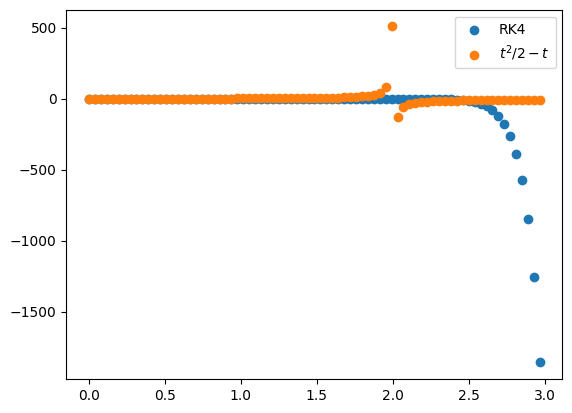

In [ ]:
y_05 = approx_a1.iloc[[10*i for i in range(77)],2].to_numpy()
real_05 = [(t**2/(2-t)) for t in x_05]

plt.scatter(x_05, y_05, label='RK4')
plt.scatter(x_05, real_05, label='$t^{2}/2-t$')
plt.legend()
plt.show()

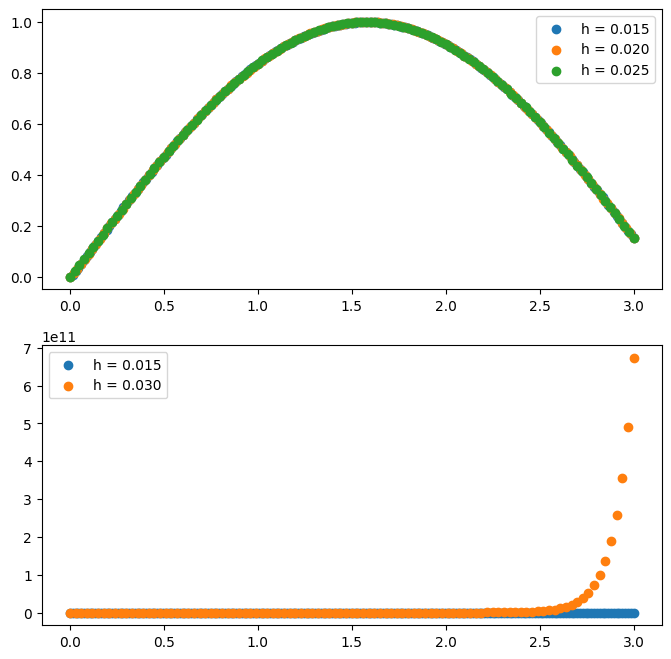

In [ ]:
#7
plt.figure(figsize=(8,8))
approx_a1 = RK4((lambda t, x : (100*(np.sin(t)-x))), 0, 0, 0.015, int(3/0.015))
approx_a2 = RK4((lambda t, x : (100*(np.sin(t)-x))), 0, 0, 0.020, int(3/0.020))
approx_a3 = RK4((lambda t, x : (100*(np.sin(t)-x))), 0, 0, 0.025, int(3/0.025))
approx_a4 = RK4((lambda t, x : (100*(np.sin(t)-x))), 0, 0, 0.030, int(3/0.030))

ax1 = plt.subplot(2, 1, 1)
plt.scatter(approx_a1.iloc[:,1], approx_a1.iloc[:,2], label='h = 0.015')
plt.scatter(approx_a2.iloc[:,1], approx_a2.iloc[:,2], label='h = 0.020')
plt.scatter(approx_a3.iloc[:,1], approx_a3.iloc[:,2], label='h = 0.025')
plt.legend()

ax2 = plt.subplot(2, 1, 2)
plt.scatter(approx_a1.iloc[:,1], approx_a1.iloc[:,2], label='h = 0.015')
plt.scatter(approx_a4.iloc[:,1], approx_a4.iloc[:,2], label='h = 0.030')
plt.legend()
plt.show()

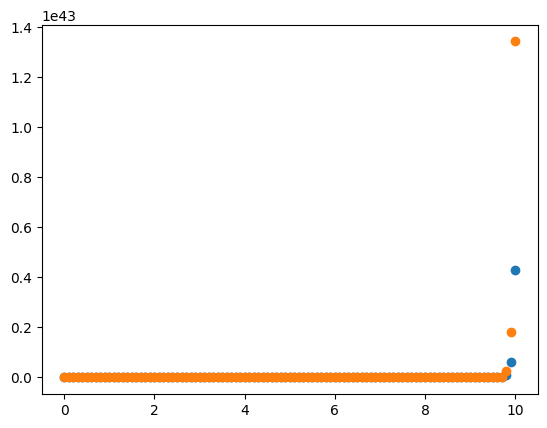

In [ ]:
#9

approx_a1 = RK4((lambda t, x : (2*x*t+t)), 0, 0, 0.1, int(10*10))

sol_07 = [(np.exp(t**2) - 1)/2 for t in approx_a1.iloc[:, 1].to_numpy()]

plt.scatter(approx_a1.iloc[:, 1], approx_a1.iloc[:, 2], label='RK4')
plt.scatter(approx_a1.iloc[:, 1], sol_07, label='$(e^{t^{2}}-1)/2$')
plt.show()

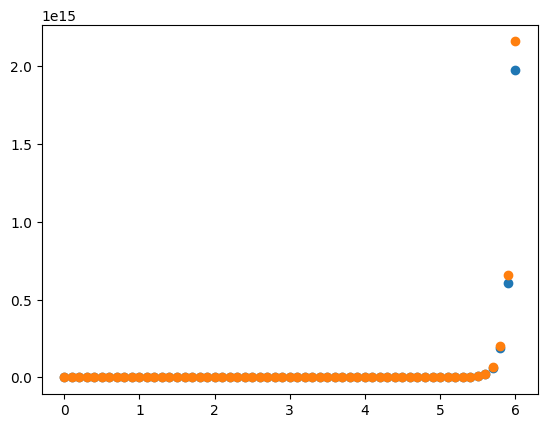

In [ ]:
plt.scatter(approx_a1.iloc[:-40, 1], approx_a1.iloc[:-40, 2], label='RK4')
plt.scatter(approx_a1.iloc[:-40, 1], sol_07[:-40], label='$(e^{t^{2}}-1)/2$')
plt.show()

In [ ]:
#11

def RK2(f_, t_, x_, h_, alpha, n):
  deriv_table = []
  deriv_table.append([0, t_, x_])
  t0 = t_
  for j in range(1, n+1):
    K1 = h_*f_(t_,x_)
    K2 = h_*f_(t_ + alpha*h_, x_ + alpha*K1)

    x_ += (1-1/(2*alpha))*K1 + (1/(2*alpha))*K2
    t_ = t0 + j*h_

    deriv_table.append([j, t_, x_])

  deriv_table = pd.DataFrame(deriv_table)
  return deriv_table

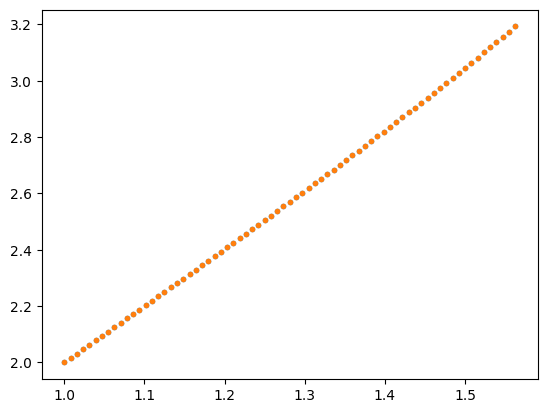

In [ ]:
#13

approx_a1 = RK4((lambda t, x : 2 + (x - t - 1)**2), 1, 2, 0.5625/72, 72)
approx_a2 = RK2((lambda t, x : 2 + (x - t - 1)**2), 1, 2, 0.5625/72, 2/3, 72)

plt.scatter(approx_a2.iloc[:, 1], approx_a2.iloc[:, 2], label='RK2', marker='.')
plt.scatter(approx_a1.iloc[:, 1], approx_a1.iloc[:, 2], label='RK4', marker='.')

plt.show()

In [ ]:
#15

def RK5(f_, t_, x_, h_, n):
  deriv_table = []
  deriv_table.append([0, t_, x_])
  t0 = t_
  for j in range(1, n+1):
    K1 = h_*f_(t_,x_)
    K2 = h_*f_(t_ + h_/2, x_ + K1/2)
    K3 = h_*f_(t_ + h_/2, x_ + K2/2)
    K4 = h_*f_(t_+h_, x_ + K3)

    x_ += (K1 + 2*K2 + 2*K3 + K4)/6
    t_ = t0 + j*h_

    deriv_table.append([j, t_, x_])

  deriv_table = pd.DataFrame(deriv_table)
  return deriv_table

# 7.3 적응적 룽게-쿠타법 및 다단계법

## 적응적 룽게-쿠타-펠버그 방법

초깃값 문제의 수치 해를 찾는 문제에서는 항상 정밀도를 예측할 필요가 있으며, 허용오차를 벗어나지 않아야 한다. 그리고 허용오차가 허용 가능한 최대 단계 크기를 결정한다. 그러나 적절한 단계 크기를 결정 하는 건 어려울 수 있어 단계 크기를 자동으로 조정하기 위한 다양한 방법들이 개발되어 왔다.

수치 결과의 차이는 국소 절단오차의 추정치로 간주할 수 있다.

따라서 실제적으로 이 차이가 사전에 정해진 허용오차 이내이면 현재의 단계 크기 $h$로 만족할 수 있다. 만일 이 차이가 허용오차를 초과한다면 단계 크기를 절반으로 줄인다.

위 설명은 쉽게 짜여질 수 있지만 계산 시간의 측면에서는 다소 낭비가 있기 때문에 권장되지 않는다. 더욱 정교한 방법이 펠버그에 의해 개발된 ***4차 룽게-쿠타-펠버그법***이다.

$$x(t+h) = x(t) + \frac{25}{216}K_{1} + \frac{1408}{2565}K_{3} + \frac{2197}{4104}K_{4} - \frac{1}{5}K_{5}$$

그리고 다음과 같은 한 번의 추가적인 함수 계산($K_{6}$)으로 5차 룽게-쿠타법을 얻을 수 있다.

$$x(t+h) = x(t) + \frac{16}{135}K_{1} + \frac{6656}{12825}K_{3} + \frac{28561}{56430}K_{4} - \frac{9}{50}K_{5} + \frac{2}{55}K_{6}$$

4차와 5차의 절차로부터 얻은 $x(t+h)$값의 차이는 4차 절차에서의 국소 절단오차의 추정값이다. 다라서 여섯 번의 함수 계산은 5차 근삿값 및 오차 추정값을 제공한다.

In [ ]:
#룽게-쿠타-펠버그법
def RK45(f_, t_, x_, h_):
  C2 = [0.25, 0.25]
  C3 = [0.375, 0.09375, 0.28125]
  C4 = [12./13., 1932./2197., -7200./2197., 7296./2197.]
  C5 = [1., 439./216., -8., 368./513., -845./4104.]
  C6 = [0.5, -8/27., 2, -3544./2565., 1859./4104., -0.275]

  a_ = np.array([25./216., 0, 1408./2565., 2197./4104., -0.2])
  b_ = np.array([16./135., 0, 6656./12825., 28561./56430., -0.18, 2./55.])

  C_ = [C2, C3, C4, C5, C6]
  K1 = h_*f_(t_,x_)

  K_ = [K1]
  for i in range(5):
    t_temp = t_ + C_[i][0]
    x_temp = x_
    for j in range(i+1):
      x_temp += C_[i][j+1]*K_[i]

    K_temp = h_*f_(t_temp, x_temp)
    K_.append(K_temp)
  K_ = np.array(K_)

  x4 = x_ + np.dot(a_, K_[:-1])
  x5 = x_ + np.dot(b_, K_)

  t_ = t_+h_
  error = np.abs(x4 - x5)

  return t_, x5, error

In [ ]:
def Test_RK45():
  def test_f(t, x):
    return (2+(x-t-1)**2)

  a = 1
  b = 1.5625
  x = 2.0
  n = 72
  h = (b-a)/n
  t = a

  deriv_table = []
  deriv_table.append([0, t, x, 0])

  for j in range(1, n+1):
    t, x, error = RK45(test_f, t, x, h)
    deriv_table.append([j, t, x, error])
  deriv_table = pd.DataFrame(deriv_table)
  return deriv_table

In [ ]:
Test_df = Test_RK45().loc[[i*6 for i in range(13)]]
Test_df

,0,1,2,3
0,0,1.000000,2.000000,0.000000
6,6,1.046875,2.105427,0.000041
12,12,1.093750,2.208701,0.000037
18,18,1.140625,2.310177,0.000034
24,24,1.187500,2.410172,0.000031
30,30,1.234375,2.508974,0.000028
36,36,1.281250,2.606849,0.000026
42,42,1.328125,2.704044,0.000024
48,48,1.375000,2.800798,0.000022
54,54,1.421875,2.897339,0.000019


허용 가능한 오차 추정치에 대한 사용자 지정 한계로부터 단계 크기 $h$는 $\epsilon$을 이 한계 내에 유지하기 위해 필요에 따라 두 배가 되거나 절반이 된다.

허용 가능한 단계 크기 $h$의 범위도 사용자가 지정한다. 사용자는 적응적 프로시저가 무한 루프에 빠지지 않도록 주의하여 한계를 설정하고 동일한 점에서부터 단계 크기를 반으로 줄이거나 두 배로 늘이는 것을 반복하여 시도하여야 한다.

적응적 과정은 다음과 같다.

---

***적응적 과정의 개요***
1. RK45 루틴이 주어진 단계 크기 $h$와 초깃값 $x(t)$에 대하여 $x(t+h)$값과 오차 추정치 $\epsilon$을 계산한다.

2. $\epsilon_{min} \leq \epsilon \leq \epsilon_{max}$이면 단계 크기 $h$는 변하지 않으며 다음 단계는 단계 1을 초깃값 $x(t+h)$로 반복하여 수행한다.

3. $\epsilon$이 한계치 보다 작고, $|2h|\leq h_{max}$ 일 때, $h$를 $2h$로 대체한다.

4. $\epsilon$이 한계치 보다 크고, $|h/2| \geq h_{min}$ 일 때, $h$를 $h/2$로 대체한다.

5. $|h|$가 한계치를 만족하면 $x(t)$와 새로운 $h$의 값을 가지고 단계 1로 돌아감으로써 그 단계를 반복한다.

In [ ]:
def RK45_Adap(f_, t_a, x_, h_, t_b, itmax, error_, interval_):
  delta = 5e-6
  t_ = t_a
  deriv_table = []
  deriv_table.append([0, h_, t_, x_, 0])

  iflag = 1
  k = 0
  while k < itmax+1:
    k += 1
    if np.abs(h_) < interval_[0]:
      h_ = np.sign(h_)*interval_[0]
    if np.abs(h_) > interval_[1]:
      h_ = np.sign(h_)*interval_[1]

    d = np.abs(t_b - t_)
    if d <= np.abs(h_):
      iflag = 0
      if d <= delta*np.max([np.abs(t_b), np.abs(t_)]): ## 마지막 t 구간의 크기가 매우 작을 경우 종료
        break

      h_ = np.sign(h_)*d

    x_save = x_
    t_save = t_

    t_, x_, error = RK45(f_, t_, x_, h_)
    deriv_table.append([k, h_, t_, x_, error])

    if iflag==0:
      break

    if error < error_[0]:
      h_ = 2*h_

    if error > error_[1]:
      h_ = h_/2.
      x_ = x_save
      t_ = t_save
      k  = k - 1

  deriv_table = pd.DataFrame(deriv_table, columns=['attempt k', 'interval h', 't', 'x(t)', 'error'])

  return deriv_table

In [ ]:
def Test_RK45_Adap():
  itmax = 3000
  error_ = [1e-8, 1e-5]
  interval_ = [1e-6, 1.]
  t_a = 0.0
  x_ = 0.0
  h_ = 0.01
  t_b = 10.0

  def test_f(t, x):
    return 3 + 5*np.sin(t) +0.2*x

  return RK45_Adap(test_f, t_a, x_, h_, t_b, itmax, error_, interval_)

Test_RK45_Adap()

,attempt k,interval h,t,x(t),error
0,0,0.0100,0.0000,0.000000,0.000000
1,1,0.0100,0.0100,0.053186,0.000016
2,1,0.0050,0.0050,0.026542,0.000004
3,2,0.0050,0.0100,0.053217,0.000004
4,3,0.0050,0.0150,0.080022,0.000004
...,...,...,...,...,...
2748,2746,0.0025,9.9900,132.076302,0.000004
2749,2747,0.0025,9.9925,132.139406,0.000004
2750,2748,0.0025,9.9950,132.202527,0.000004
2751,2749,0.0025,9.9975,132.265665,0.000004


### 애덤스-배쉬포스-몰튼 공식

이제 하나의 1차 상미분방정식을 풀기 위해 수치 구적법을 사용하는 전략을 소개한다. 모델 방정식은 다음과 같다.

$$ x'(t) = f(t, x(t))$$
미지의 함숫값이 $t$의 왼쪽에 있는 몇 개의 점, 즉 $t, \:t-h, \:t-2h, \:\dots, \:t-(n-1)h$에서 계산되었다고 가정한다. 이 때 $x(t+h)$를 계산하려 한다.
\begin{eqnarray}
x(t+h) &= &x(t) + \int^{t+h}_{t}{x'(s)ds} \\
& = &x(t) + \int^{t+h}_{t}{f(s, x(s))ds} \\
&\approx &x(t) + \sum^{n}_{j=1}{c_{j}f_{j}} \qquad [\:f_{j} = f(t-(j-1)h, x(t-(j-1)h)) \:]
\end{eqnarray}

마지막 줄에 적절한 수치 적분 공식을 도입하였다. 구간 $[0, 1]$에 대한 수치 적분 공식 중 가장 간단한 애덤스-배쉬포스 공식의 경우 점 $0, -1, -2, \dots, 1-n$에서의 피적분 함수의 값을 활용한다.

In [ ]:
# n = 4 에서 애덤스-배쉬포스 공식의 계수
A_ = []

for i in range(4):
  i = i+1
  A_temp = []
  for j in range(4):
    j = j+1
    A_temp.append((1-j)**(i-1))
  A_.append(A_temp)

A_ = np.array(A_)

b_ = np.array([1/i for i in range(1, 5)])
b_ = b_.reshape(4, 1)

c_ = np.dot(np.linalg.inv(A_), b_)
# c_ = array([[ 55/24], [-59/24], [ 37/24], [-3/8]])
c_

array([[ 2.29166667],
       [-2.45833333],
       [ 1.54166667],
       [-0.375     ]])

애덤스-몰튼 공식을 얻기 위해 다음과 같은 형태의 구적법에서부터 시작한다.

$$\int^{1}_{0}{G(r)dr} \approx \sum^{n}_{j=1}{C_{j}G(2-j)}$$

이와 유사한 프로그램의 결과로 계수 $(\frac{9}{24}, \frac{19}{24}, -\frac{5}{24}, \frac{1}{24})$ 를 얻었다. 두 구적법은 1에서의 피적분 함수의 값 사용에 있어서 차이가 있다.

이는 7.5절에서 다시 다루어진다.

### 안정성 분석

다음의 초깃값 문제의 수치 해에서 필연적으로 발생할 수 있는 오차에 대한 논의를 할 것이다.

\begin{eqnarray}
\begin{cases}
x'=f(t, x)\\
x(a) = s
\end{cases}
\end{eqnarray}

이는 초깃값에서 서로 다른 해 곡선의 모임 $x = se^(t-a)$를 만든다. 이 때, 초깃값 $s$가 약간의 반올림 오차를 가진 채 컴퓨터에 얽힌다고 가정한다. 그러면 모든 후속 게산이 정확하고 절단오차가 발생하지 않더라도 계산된 해는 여전히 잘못된 값이다.

이 곡선들은 서로 발산하기 때문에 초기에 만들어진 모든 사소한 오차가 결과적으로 엄청난 정확성 손실을 초래한다.

반대로 $x = se^{-(t-a)}$ 일 때, 이 곡선들은 $t$가 증가함에 따라 서로 가까워지며, 수치 해에서 만들어지는 오차가 여전히 잘못된 곡선을 선택하도록 하더라도 곡선이 서로 합쳐지기 때문에 그 효과는 그리 심하지 않다.

주어진 단계에서 근사 해의 전역 오차는 그 단계에서의 국소 오차와 그 이전의 모든 단계에서 누적된 모든 국소 오차의 효과를 둘 다 포함한다. 발산하는 해 곡선일 때 각 단계에서의 국소 오차는 시간이 지남에 따라 커지며, 모든 국소 오차의 합보다 클 수도 있다. 반대로 수렴하는 해 곡선일 때, 각 단게에서의 국소 오차는 시간이 지남에 따라 감소하고, 전역 오차는 모든 국소 오차의 합보다 작을 수 있다.

위와 같은 일반적인 미분방정식에서 발산하는 해와 수렴하는 해를 구분하는 방법은 간단하다. 만약 어떤 양수 $\delta$에 대하여 $f_{x} > \delta$ 이면 곡선들은 발산한다. 그러나 $f_{x} < \delta $이면 곡선들은 수렴한다.

In [ ]:
#3
#3차 애덤스-배쉬포스-몰튼법
#[23/12, -16/12, 5/12]
def AB3(f_, t_, x_):
  ## 미지의 x(t) 에 대하여, t, t-h, t-2h 에서 x 값이 계산되었다고 가정한다.
  bashforth = [23./12., -16./12., 5./12.]
  moulton = [8./12., -1./12., 5./12.] ##[t, t-h, t+h] 순으로 생성

  h_ = t_[0] - t_[1]

  adams_bashforth = x_[0]
  adams_moulton = x_[0]

  for i in range(2):
    adams_bashforth += h_ * bashforth[i] * f_(t_[i], x_[i])
    adams_moulton += h_ * moulton[i] * f_(t_[i], x_[i])

  adams_bashforth += h_ * bashforth[2] * f_(t_[2], x_[2])
  adams_moulton += h_ * moulton[2] * f_(t_[0] + h_, adams_bashforth)

  error = np.abs(adams_bashforth - adams_moulton)

  return adams_bashforth, error

def AB3_Adap(f_, t_a, x_, h_, t_b, itmax, error_, interval_):
  delta = 5e-6
  t_ = t_a
  x_t = x_(t_)
  deriv_table = []
  deriv_table.append([h_, t_, x_t, 0])

  iflag = 1
  k = 0
  while k < itmax+1:
    k += 1
    if np.abs(h_) < interval_[0]:
      h_ = np.sign(h_)*interval_[0]
    if np.abs(h_) > interval_[1]:
      h_ = np.sign(h_)*interval_[1]

    d = np.abs(t_b - t_)
    if d <= np.abs(h_):
      iflag = 0
      if d <= delta*np.max([np.abs(t_b), np.abs(t_)]):
        break

      h_ = np.sign(h_)*d

    x_save = x_t
    t_save = t_

    t_list = np.array([t_, t_ - h_, t_ - 2*h_])
    x_list = x_(t_list)

    x_t, error = AB3(f_, t_list, x_list)
    t_ = t_ + h_
    error = error / 10.
    #print(error)
    deriv_table.append([h_, t_, x_t, error])

    if iflag==0:
      break

    if error < error_[0]:
      h_ = 2*h_

    if error > error_[1]:
      h_ = h_/2.
      x_t = x_save
      t_ = t_save
      k  = k - 1

  deriv_table = pd.DataFrame(deriv_table, columns=['interval h', 't', 'x(t)', 'error'])

  return deriv_table

In [ ]:
def Test_AB3_Adap():
  itmax = 3000
  error_ = [1e-8, 1e-5]
  interval_ = [1e-6, 1.]
  t_a = 0.0
  x_ = 0.0
  h_ = 0.01
  t_b = 10.0

  def test_f(t, x):
    return 3 + 5*np.sin(t) +0.2*x

  def test_x(t):
    return 3*t - 5*np.cos(t) + (t**2 / 10) + 5

  print("x(b) : ", test_x(t_b))
  return AB3_Adap(test_f, t_a, test_x, h_, t_b, itmax, error_, interval_)

Test_AB3_Adap()

x(b) :  49.19535764538226


,interval h,t,x(t),error
0,0.01,0.00,0.000000,0.000000e+00
1,0.01,0.01,0.030280,3.985262e-10
2,0.02,0.03,0.092505,5.863939e-09
3,0.04,0.07,0.223595,2.477446e-07
4,0.04,0.11,0.363045,7.670972e-10
...,...,...,...,...
844,0.01,9.96,49.179204,6.524290e-06
845,0.01,9.97,49.203447,6.526686e-06
846,0.01,9.98,49.227281,6.529014e-06
847,0.01,9.99,49.250710,6.531274e-06


In [ ]:
#5 - RK45

def Test_RK45_Adap():
  itmax = 3000
  error_ = [1e-11, 1e-9]
  interval_ = [1e-6, 1.]
  t_a = 3.
  x_ = 6.
  h_ = -0.01
  t_b = 1/2

  def test_f(t, x):
    return (3*x)/t + (9*t)/2 - 13

  def test_x(t):
    return t**3 - (9/2)*t**2 + (13/2)*t

  print("x(b) : ", test_x(t_b))
  return RK45_Adap(test_f, t_a, x_, h_, t_b, itmax, error_, interval_)

Test_RK45_Adap()

x(b) :  2.25


,attempt k,interval h,t,x(t),error
0,0,-0.01000,3.000000,6.000000,0.000000e+00
1,1,-0.01000,2.990000,5.921801,8.255755e-05
2,1,-0.00500,2.995000,5.960630,2.081339e-05
3,1,-0.00250,2.997500,5.980247,5.239744e-06
4,1,-0.00125,2.998750,5.990107,1.321784e-06
...,...,...,...,...,...
3006,2997,-0.00002,2.941465,5.552603,6.083072e-10
3007,2998,-0.00002,2.941445,5.552460,6.083027e-10
3008,2999,-0.00002,2.941426,5.552316,6.082983e-10
3009,3000,-0.00002,2.941406,5.552172,6.082939e-10


In [ ]:
#5 - AB3

def Test_AB3_Adap():
  itmax = 3000
  error_ = [1e-11, 1e-9]
  interval_ = [1e-6, 1.]
  t_a = 3.
  x_ = 6.
  h_ = -0.01
  t_b = 1/2

  def test_f(t, x):
    return (3*x)/t + (9*t)/2 - 13

  def test_x(t):
    return t**3 - (9/2)*t**2 + (13/2)*t

  print("x(b) : ", test_x(t_b))
  return AB3_Adap(test_f, t_a, test_x, h_, t_b, itmax, error_, interval_)

Test_AB3_Adap()

x(b) :  2.25


,interval h,t,x(t),error
0,-0.01,3.00,6.000000,0.000000e+00
1,-0.01,2.99,5.935449,0.000000e+00
2,-0.02,2.97,5.809023,8.881784e-17
3,-0.04,2.93,5.566707,8.881784e-17
4,-0.08,2.85,5.122875,8.881784e-17
5,-0.16,2.69,4.387659,0.000000e+00
6,-0.32,2.37,3.441003,3.552714e-16
7,-0.64,1.73,2.954667,4.440892e-16
8,-1.00,0.73,2.735967,2.220446e-15
9,-0.23,0.50,2.250000,8.881784e-17


In [ ]:
#7
#h의 제곱에 대한 오차비율이 유계임을 확인할 수 있다.
#h의 다섯 제곱에 대한 오차비율이 유계가 아님. 왜일까.
import math

def RK4_error():
  t_0 = 0
  x_0 = 0

  def x0(t): # x(t)
    return 3*t - 5*np.cos(t) + (t**2 / 10) + 5

  def test_f(t, x): # x'(t) = test_f(t, x(t))
    return 3 + 5*np.sin(t) +0.2*x

  error_list = []

  h_list = [1/(i**2) for i in np.arange(1, 25)]

  error = 1

  for j in range(len(h_list)):
    h_ = h_list[j]
    x_correct = x0(t_0 + h_)

    K1 = h_*test_f(t_0, x_0)
    K2 = h_*test_f(t_0 + h_/2, x_0 + K1/2)
    K3 = h_*test_f(t_0 + h_/2, x_0 + K2/2)
    K4 = h_*test_f(t_0 + h_, x_0 + K3)

    x_RK4 = x_0 + (K1 + 2*K2 + 2*K3 + K4)/6

    error_ex = error
    error = np.abs(x_correct - x_RK4)

    error_ratio = error / error_ex

    const = error / ((h_)**2)
    error_list.append([x_correct, x_RK4, h_, h_**5, error, error_ratio, const])

  error_list = pd.DataFrame(error_list, columns=['Real x(t+h)', 'RK4', 'h', 'h^{5}', 'error', 'error_ratio', 'const of order 2'])
  print("h^{5} ratio : ", (h_list[10]/h_list[9])**5)
  return error_list

RK4_error()

h^{5} ratio :  0.3855432894295318


,Real x(t+h),RK4,h,h^{5},error,error_ratio,const of order 2
0,5.398488,5.788110,1.000000,1.000000e+00,3.896214e-01,0.389621,0.389621
1,0.911688,0.927134,0.250000,9.765625e-04,1.544648e-02,0.039645,0.247144
2,0.365400,0.368127,0.111111,1.693509e-05,2.726500e-03,0.176513,0.220847
3,0.197653,0.198480,0.062500,9.536743e-07,8.269587e-04,0.303304,0.211701
4,0.124159,0.124491,0.040000,1.024000e-07,3.319699e-04,0.401435,0.207481
5,0.085339,0.085498,0.027778,1.653817e-08,1.583273e-04,0.476933,0.205192
6,0.062307,0.062392,0.020408,3.540133e-09,8.488686e-05,0.536148,0.203813
7,0.047510,0.047559,0.015625,9.313226e-10,4.954075e-05,0.583609,0.202919
8,0.037433,0.037464,0.012346,2.867972e-10,3.083462e-05,0.622409,0.202306
9,0.030260,0.030280,0.010000,1.000000e-10,2.018676e-05,0.654678,0.201868


In [ ]:
#9

def Test_RK45():
  def test_f(t, x):
    return (2*t/np.log(x))

  a = 1
  b = np.exp(1)
  x = np.exp(1)
  n = 40
  h = (b-a)/n
  t = a

  deriv_table = []
  deriv_table.append([t, x, 0])

  for j in range(1, n+1):
    t, x, error = RK45(test_f, t, x, h)
    deriv_table.append([t, x, error])
  deriv_table1 = pd.DataFrame(deriv_table, columns=['t', 'x', 'error'])

  a = 1
  b = 0
  x = np.exp(1)
  n = 40
  h = (b-a)/n
  t = a

  deriv_table = []
  deriv_table.append([t, x, 0])

  for j in range(1, n+1):
    t, x, error = RK45(test_f, t, x, h)
    deriv_table.append([t, x, error])
  deriv_table2 = pd.DataFrame(deriv_table, columns=['t', 'x', 'error']).iloc[1:17]

  deriv_table = pd.concat([deriv_table1, deriv_table2], axis=0)
  return deriv_table

vals = Test_RK45().sort_values(by=['t'])

<ipython-input-124-df5846b88cd0>:5: RuntimeWarning: invalid value encountered in log
  return (2*t/np.log(x))


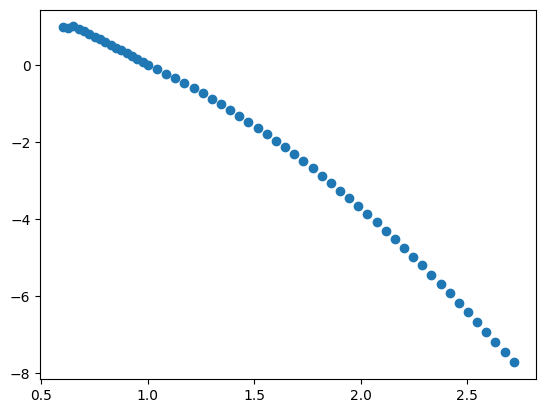

In [ ]:
val_t = vals.iloc[:, 0].to_numpy()
val_x = vals.iloc[:, 1].to_numpy()
val_x = (1-np.log(val_x))*val_x

plt.scatter(val_t, val_x)
plt.show()